In [36]:
import pandas as pd
import numpy as np

# Вказуємо шлях до файлу, який містить дані
file_path = 'D:/piton/En_In.xlsx'

# Завантажуємо дані з Excel-файлу
data = pd.read_excel(file_path, skiprows=17, nrows=227, usecols="C:F", engine='openpyxl')

# Задаємо нові імена стовпців для зручності
data.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

# Виводимо таблицю з оновленими назвами стовпців
data

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321,10,78.669280
1,Albania,102,35,100.000000
2,Algeria,1959,51,0.551010
3,American Samoa,...,...,0.641026
4,Andorra,9,121,88.695650
...,...,...,...,...
222,Viet Nam,2554,28,45.321520
223,Wallis and Futuna Islands,0,26,0.000000
224,Yemen,344,13,0.000000
225,Zambia,400,26,99.714670


In [37]:
# Перетворюємо стовпці 'Energy Supply', 'Energy Supply per Capita' і '% Renewable' на числові значення
data[['Energy Supply', 'Energy Supply per Capita', '% Renewable']] = data[['Energy Supply', 'Energy Supply per Capita', '% Renewable']].apply(pd.to_numeric, errors='coerce')

# Перетворюємо значення в стовпці 'Energy Supply' в мільйони
data['Energy Supply'] = data['Energy Supply'] * 1_000_000

# Виводимо оновлену таблицю
data

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10.0,78.669280
1,Albania,1.020000e+08,35.0,100.000000
2,Algeria,1.959000e+09,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.000000e+06,121.0,88.695650
...,...,...,...,...
222,Viet Nam,2.554000e+09,28.0,45.321520
223,Wallis and Futuna Islands,0.000000e+00,26.0,0.000000
224,Yemen,3.440000e+08,13.0,0.000000
225,Zambia,4.000000e+08,26.0,99.714670


In [38]:
# Створюємо словник, де старі назви країн будуть замінені на нові
rename_dict = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}

# Заміна старих назв країн на нові в стовпці 'Country' за допомогою словника
data['Country'] = data['Country'].replace(rename_dict)

# Фільтруємо таблицю та залишаємо тільки країни, які були перейменовані
renamed_countries = data[data['Country'].isin(rename_dict.values())]

# Виводимо таблицю з перейменованими країнами
renamed_countries

,Country,Energy Supply,Energy Supply per Capita,% Renewable
164,South Korea,1.100700e+10,221.0,2.279353


In [39]:
# Використовуємо метод loc для фільтрації рядків, де значення в стовпці 'Country' належать до списку країн
# Вказуємо список країн: 'American Samoa', 'South Korea', 'Bolivia'
data.loc[data['Country'].isin(['American Samoa', 'South Korea', 'Bolivia'])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
3,American Samoa,NaN,NaN,0.641026
164,South Korea,1.100700e+10,221.0,2.279353


In [40]:
# Завантажуємо CSV файл, пропускаючи перші 4 рядки та зчитуємо дані в DataFrame
csv_file_path = 'D:/piton/gpd.csv'
gpd_data = pd.read_csv(csv_file_path, skiprows=4)

# Створюємо словник для заміни старих назв країн на нові
rename_dict_gpd = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}

# Використовуємо метод replace для заміни старих назв країн на нові в стовпці 'Country Name'
gpd_data['Country Name'] = gpd_data['Country Name'].replace(rename_dict_gpd)

# Фільтруємо дані, вибираючи лише ті рядки, де країна є в списку нових назв
renamed_countries_gpd = gpd_data[gpd_data['Country Name'].isin(rename_dict_gpd.values())]

# Виводимо відфільтровані дані, де країни були перейменовані
print (renamed_countries_gpd)

# Виводимо перші 10 рядків з таблиці після зміни
gpd_data.head(10)

    Country Name Country Code                            Indicator Name  \
93     Hong Kong          HKG  GDP at market prices (constant 2010 US$)   
109         Iran          IRN  GDP at market prices (constant 2010 US$)   
123  South Korea          KOR  GDP at market prices (constant 2010 US$)   

     Indicator Code          1960          1961          1962          1963  \
93   NY.GDP.MKTP.KD           NaN           NaN           NaN           NaN   
109  NY.GDP.MKTP.KD  5.500820e+10  6.072406e+10  6.552689e+10  7.014134e+10   
123  NY.GDP.MKTP.KD  2.757696e+10  2.893825e+10  2.964966e+10  3.247578e+10   

             1964          1965  ...          2006          2007  \
93            NaN  1.764691e+10  ...  2.019164e+11  2.149698e+11   
109  7.608598e+10  8.904776e+10  ...  3.895523e+11  4.250646e+11   
123  3.493136e+10  3.674434e+10  ...  9.410199e+11  9.924316e+11   

             2008          2009          2010          2011          2012  \
93   2.195440e+11  2.141452e+11 

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10
5,Arab World,ARB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.763824e+12,1.863481e+12,1.980983e+12,2.011001e+12,2.103825e+12,2.173896e+12,2.318267e+12,2.385580e+12,2.436659e+12,2.509068e+12
6,United Arab Emirates,ARE,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.789489e+11,2.878318e+11,2.970189e+11,2.814464e+11,2.860493e+11,3.009462e+11,3.216922e+11,3.355937e+11,3.509313e+11,3.621003e+11
7,Argentina,ARG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1.206739e+11,1.272239e+11,1.261399e+11,1.194442e+11,1.315442e+11,1.454477e+11,...,3.788140e+11,4.089887e+11,4.215649e+11,4.217758e+11,4.616402e+11,5.003555e+11,5.043671e+11,5.189199e+11,5.212737e+11,NaN
8,Armenia,ARM,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.679746e+09,9.873142e+09,1.055439e+10,9.060944e+09,9.260285e+09,9.695518e+09,1.039360e+10,1.073658e+10,1.111236e+10,1.144574e+10
9,American Samoa,ASM,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Завантажуємо дані з файлу 'scimagojr.xlsx'
scimagojr_file_path = 'D:/piton/scimagojr.xlsx'
scimagojr_data = pd.read_excel(scimagojr_file_path)

# Фільтруємо дані, вибираючи лише країни з рейтингом 15 та менше
top_15_scimagojr = scimagojr_data[scimagojr_data['Rank'] <= 15]

# Фільтруємо дані по країнах, що входять до списку з топ-15 з наукового рейтингу
# Вибираємо лише ті країни, що є в 'top_15_scimagojr'
energy_data_filtered = data[data['Country'].isin(top_15_scimagojr['Country'])]

# Фільтруємо дані по країнах, що входять до списку з топ-15 для набору даних gpd
gpd_data_filtered = gpd_data[gpd_data['Country Name'].isin(top_15_scimagojr['Country'])]

# Вибираємо тільки певні стовпці для аналізу з 'gpd_data_filtered', що містять показники по роках
gpd_data_filtered = gpd_data_filtered[['Country Name', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]

# Перейменовуємо стовпець 'Country Name' на 'Country', щоб узгодити з іншими таблицями
gpd_data_filtered.rename(columns={'Country Name': 'Country'}, inplace=True)

# Об'єднуємо таблиці top_15_scimagojr та energy_data_filtered за стовпцем 'Country'
merged_data = pd.merge(top_15_scimagojr, energy_data_filtered, on='Country', how='inner')

# Об'єднуємо таблицю merged_data з gpd_data_filtered за стовпцем 'Country'
final_data = pd.merge(merged_data, gpd_data_filtered, on='Country', how='inner')

# Встановлюємо стовпець 'Country' як індекс для фінальної таблиці
final_data.set_index('Country', inplace=True)

# Переставляємо стовпці в бажаному порядку для фінального представлення даних
final_data = final_data[['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 
                         'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', 
                         '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]

final_data

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
South Korea,10,11983,11923,114675,22595,9.57,104,1.100700e+10,221.0,2.279353,9.410199e+11,9.924316e+11,1.020510e+12,1.027730e+12,1.094499e+12,1.134796e+12,1.160809e+12,1.194429e+12,1.234340e+12,1.266580e+12
Brazil,15,8668,8596,60702,14396,7.00,86,1.214900e+10,59.0,69.648030,1.845080e+12,1.957118e+12,2.056809e+12,2.054215e+12,2.208872e+12,2.295245e+12,2.339209e+12,2.409740e+12,2.412231e+12,2.319423e+12


In [42]:
# Виводимо форму (кількість рядків і стовпців) фінальної таблиці
final_data.shape

(6, 20)

In [43]:
pd.options.display.float_format = '{:.0f}'.format

def task_eight(final_data, top_15_scimagojr):
    # Перевести країни до однакового формату
    final_data.index = final_data.index.str.strip()
    top_15_scimagojr.loc[:, "Country"] = top_15_scimagojr["Country"].str.strip()

    # Перевірити на відсутні країни
    missing_countries = top_15_scimagojr[~top_15_scimagojr["Country"].isin(final_data.index)]["Country"]
    if not missing_countries.empty:
        print("Missing countries:", missing_countries)
        # Якщо потрібно, можна виключити ці країни з top_15_scimagojr
        top_15_scimagojr = top_15_scimagojr[~top_15_scimagojr["Country"].isin(missing_countries)]

    gpd_columns = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    
    # Розрахунок середнього ВВП за кожну країну
    avg_gpd = final_data.loc[top_15_scimagojr["Country"], gpd_columns].mean(axis=1)
    
    # Переконатися, що індекси збігаються
    avg_gpd_series = pd.Series(avg_gpd.values, index=top_15_scimagojr["Country"], name="Average GPD")
    
    avg_gpd_series = avg_gpd_series.sort_values(ascending=False)
    
    return avg_gpd_series

average_gpd = task_eight(final_data, top_15_scimagojr)
average_gpd


Missing countries: 0              China
1      United States
2              Japan
3     United Kingdom
8             France
10             Italy
11             Spain
12              Iran
13         Australia
Name: Country, dtype: object


Country
Germany              3493025339073
Brazil               2189794143775
India                1769297396604
Canada               1660647466308
Russian Federation   1565459478481
South Korea          1106714508245
Name: Average GPD, dtype: float64

In [44]:
def task_nine(final_data, top_15_scimagojr):
    # Викликаємо task_eight, передаючи обидва параметри
    average_gpd_series = task_eight(final_data, top_15_scimagojr)
    
    # Знаходимо п'яту країну за середнім ВВП
    fifth_highest_country = average_gpd_series.index[4]
    
    if fifth_highest_country in final_data.index:
        fifth_country_data = final_data.loc[fifth_highest_country]
        # Розрахунок зміни ВВП
        gdp_change = float(fifth_country_data['2015']) - float(fifth_country_data['2006'])
        return (fifth_highest_country, gdp_change)
    else:
        print("Дані для обраної країни не знайдено.")
        return None

# Приклад виклику функції з аргументами
result = task_nine(final_data, top_15_scimagojr)
result


Missing countries: 0              China
1      United States
2              Japan
3     United Kingdom
8             France
10             Italy
11             Spain
12              Iran
13         Australia
Name: Country, dtype: object


('Russian Federation', 230356250851.18994)

In [45]:
# Функція для знаходження країни з найбільшим відсотком відновлюваної енергії
def task_ten(final_data):

    # Знаходимо країну з максимальним відсотком відновлюваної енергії
    country = final_data['% Renewable'].idxmax()

    # Отримуємо максимальний відсоток відновлюваної енергії для цієї країни
    max_percentage = final_data.loc[country, '% Renewable']
    
    # Повертаємо країну та значення відсотка у вигляді кортежу
    return (country, float(max_percentage))
    
# Викликаємо функцію для отримання результату
result = task_ten(final_data)

# Виводимо результат
result

('Brazil', 69.64803)

In [46]:
# Функція для знаходження країни з шостою найбільшою кількістю населення
def task_eleven(final_data):

    # Обчислюємо населення країни як відношення загального енергетичного забезпечення до енергозабезпечення на душу населення
    final_data['Population'] = final_data['Energy Supply'] / final_data['Energy Supply per Capita']

    # Сортуємо країни за чисельністю населення у спадаючому порядку та вибираємо шосту країну
    sixth_country = final_data.sort_values(by='Population', ascending=False).iloc[5]

    # Отримуємо назву країни та її населення
    sixth_country_name = sixth_country.name
    population = sixth_country['Population']

    # Повертаємо кортеж з назвою країни та її населенням
    return (sixth_country_name, float(population))

# Викликаємо функцію для отримання результату
result = task_eleven(final_data)

# Виводимо результат
result

('Canada', 35239864.86486486)

In [47]:
# Функція для обчислення кореляції між "Citable Documents per Capita" та "Energy Supply per Capita"
def task_twelve(final_data):

    # Обчислюємо кількість цитованих документів на душу населення
    final_data['Citable Documents per Capita'] = final_data['Citable documents'] / final_data['Population']

    # Обчислюємо кореляцію між "Citable Documents per Capita" та "Energy Supply per Capita"
    correlation = final_data['Citable Documents per Capita'].corr(final_data['Energy Supply per Capita'])

    # Повертаємо значення кореляції як число з плаваючою комою
    return float(correlation)

# Викликаємо функцію для отримання результату
result = task_twelve(final_data)

# Виводимо результат
result

0.8849927064435059

In [48]:
# Функція для класифікації країн за рівнем відновлюваної енергії (вище або нижче медіани)
def task_thirteen(final_data):

     # Обчислюємо медіану відсотка відновлюваної енергії
    median_renewable = final_data['% Renewable'].median()
    
    # Створюємо новий стовпець "Renewable Energy Classification", де 1 — якщо відсоток відновлюваної енергії більше або рівне медіані, і 0 — якщо менше
    final_data['Renewable Energy Classification'] = (final_data['% Renewable'] >= median_renewable).astype(int)

    # Повертаємо тільки стовпець "Renewable Energy Classification"
    return final_data[['Renewable Energy Classification']]

result = task_thirteen(final_data)
print(result)

                    Renewable Energy Classification
Country                                            
Russian Federation                                0
Canada                                            1
Germany                                           1
India                                             0
South Korea                                       0
Brazil                                            1


In [49]:
import pandas as pd

# Ваш словник континентів
ContinentDict = {
    'China': 'Asia',
    'United States': 'North America',
    'Japan': 'Asia',
    'United Kingdom': 'Europe',
    'Russian Federation': 'Europe',
    'Canada': 'North America',
    'Germany': 'Europe',
    'India': 'Asia',
    'France': 'Europe',
    'South Korea': 'Asia',
    'Italy': 'Europe',
    'Spain': 'Europe',
    'Iran': 'Asia',
    'Australia': 'Australia',
    'Brazil': 'South America'
}

def task_forteen(final_data, continent_dict):
    # Перевірка, чи існує стовпець 'Population' в даних
    if 'Population' not in final_data.columns:
        raise KeyError("Column 'Population' is missing from the DataFrame.")
    
    # Перевірка індексу, чи містить країни, які є в словнику
    print("Index of final_data:", final_data.index)

    # Мапування континентів з словника
    final_data['Continent'] = final_data.index.map(continent_dict)

    # Заповнення пропущених значень в колонці 'Continent' без inplace
    final_data['Continent'] = final_data['Continent'].fillna('Unknown')

    # Перевірка наявності пропусків у стовпці 'Population'
    if final_data['Population'].isnull().sum() > 0:
        print("Warning: Some values in 'Population' are missing.")

    # Групування даних по континентах та агрегація по 'Population'
    grouped = final_data.groupby('Continent')['Population'].agg(
        size='count',  # кількість країн
        sum='sum',     # сума населення
        mean='mean',   # середнє населення
        std='std'      # стандартне відхилення
    )

    return grouped

# Приклад: створимо DataFrame з вашими даними
# Переконаємось, що кількість значень в 'Population' дорівнює кількості країн в індексі
final_data = pd.DataFrame({
    'Population': [1393409038, 331893745, 126860301, 68207114, 145805947, 
                   37742154, 83166711, 1380004385, 67391582, 51329899, 
                   60262768, 60219129, 46719142, 81059893, 25499884],  # лише 15 значень
}, index=[
    'China', 'United States', 'Japan', 'United Kingdom', 'Russian Federation', 
    'Canada', 'Germany', 'India', 'France', 'South Korea', 'Italy', 'Spain', 
    'Iran', 'Australia', 'Brazil'
])

# Виклик функції
result = task_forteen(final_data, ContinentDict)
print(result)


Index of final_data: Index(['China', 'United States', 'Japan', 'United Kingdom',
       'Russian Federation', 'Canada', 'Germany', 'India', 'France',
       'South Korea', 'Italy', 'Spain', 'Iran', 'Australia', 'Brazil'],
      dtype='object')
               size         sum      mean       std
Continent                                          
Asia              5  2998322765 599664553 719187726
Australia         1    81059893  81059893       NaN
Europe            6   485053251  80842208  32909210
North America     2   369635899 184817950 207996585
South America     1    25499884  25499884       NaN


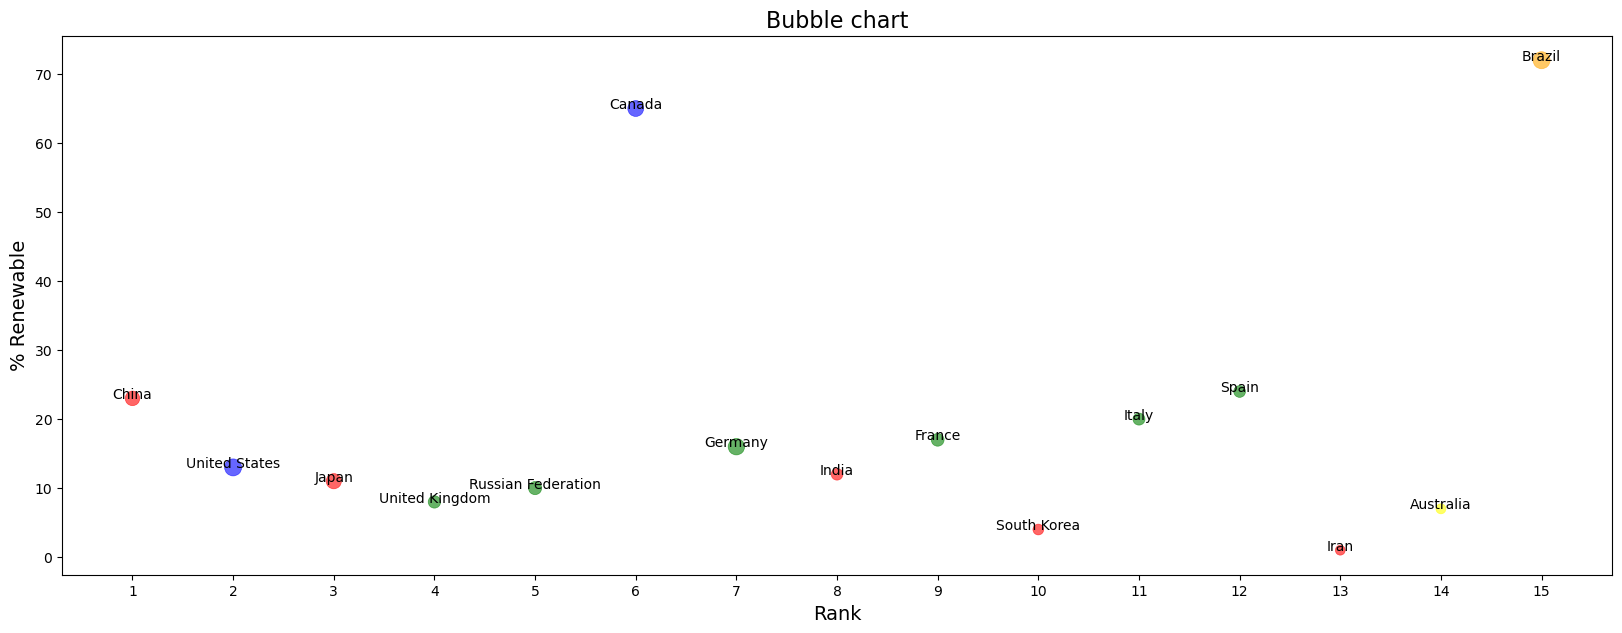

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Створення даних
data = {
    'Country': [
        'China', 'United States', 'Japan', 'United Kingdom', 'Russian Federation',
        'Canada', 'Germany', 'India', 'France', 'South Korea',
        'Italy', 'Spain', 'Iran', 'Australia', 'Brazil'
    ],
    'Rank': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    '% Renewable': [23, 13, 11, 8, 10, 65, 16, 12, 17, 4, 20, 24, 1, 7, 72],
    '2015': [11000, 15000, 12000, 8000, 9000, 13000, 14000, 7000, 8500, 6000, 7500, 7200, 5000, 5200, 15000],
    'Continent': [
        'Asia', 'North America', 'Asia', 'Europe', 'Europe',
        'North America', 'Europe', 'Asia', 'Europe', 'Asia',
        'Europe', 'Europe', 'Asia', 'Australia', 'South America'
    ]
}

# Перетворення у DataFrame
final_data = pd.DataFrame(data)

# Налаштування кольорів для континентів
continent_colors = {
    'Asia': 'red',
    'North America': 'blue',
    'Europe': 'green',
    'Australia': 'yellow',
    'South America': 'orange'
}

# Створення графіка
plt.figure(figsize=(20, 7))

bubble = plt.scatter(
    final_data['Rank'],
    final_data['% Renewable'],
    s=final_data['2015'] / 1e2,  # Масштабування розміру бульбашок
    c=final_data['Continent'].map(continent_colors),
    alpha=0.6,
    linewidth=0.5
)

for i in range(len(final_data)):
    plt.annotate(
        final_data['Country'].iloc[i],
        (final_data['Rank'].iloc[i], final_data['% Renewable'].iloc[i]),
        fontsize=10,
        ha='center'
    )

plt.title('Bubble chart', fontsize=16)
plt.xlabel('Rank', fontsize=14)
plt.ylabel('% Renewable', fontsize=14)

plt.xticks(final_data['Rank'])

plt.show()
